- numpy.random modele to create random array

In [2]:
import numpy as np

samples = np.random.normal(size =(4,4))
samples

array([[-0.52725872, -1.81675601, -0.52748936,  0.93265318],
       [-0.38359396, -1.40988833, -2.4109421 ,  1.6000118 ],
       [ 0.27869156,  0.46464526,  0.1737442 , -1.00324912],
       [ 0.6551773 , -0.24274679, -0.24527722, -1.25263487]])

- change NumPy's number generation seed using np.random.seed

In [3]:
np.random.seed(1234)

- data generation functions in numpy.random use a global random seed
- avoid global stae use numpy.random.RandomState to create a random number generator isolated from others

In [4]:
rng = np.random.RandomState(1234)

rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

## 4.7 Random Walks
- simulation of random walks to provide an illustrative application of utilizing array operations

Text(0.5, 1.0, 'A simple random walk')

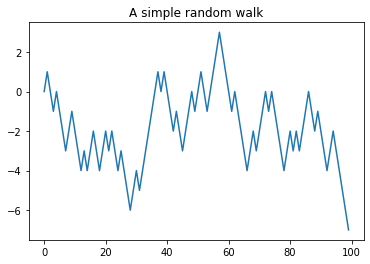

In [8]:
import random
import matplotlib.pyplot as plt

position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)
    
plt.plot(walk[:100])
plt.title('A simple random walk')

 - make the observation that walk is simply the cumulative sum of random steps
 - evaluated as array expression

use np.random module to draw 1,000 coin flips at once

In [9]:
nsteps = 1000
draws = np.random.randint(0, 2, size = nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

walk.min()

-9

In [10]:
walk.max()

60

In [11]:
(np.abs(walk) >= 10).argmax()

297

## Stimulating Many Random Walks at Once
- simulate many random walks, say 5,000 of them
- generate all of the random walks with minor modifications to the preceding code

In [12]:
nwalks = 5000
nsteps = 1000

draws = np.random.randint(0, 2, size=(nwalks, nsteps))
steps = np.where(draws>0 , 1, -1)
walks = steps.cumsum(1)

walks

array([[  1,   2,   3, ...,  46,  47,  46],
       [  1,   0,   1, ...,  40,  41,  42],
       [  1,   2,   3, ..., -26, -27, -28],
       ...,
       [  1,   0,   1, ...,  64,  65,  66],
       [  1,   2,   1, ...,   2,   1,   0],
       [ -1,  -2,  -3, ...,  32,  33,  34]], dtype=int32)

In [13]:
walks.max()

122

In [14]:
walks.min()

-128

In [15]:
#compute the minimum crossing time to 30 or -30

hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([ True,  True,  True, ...,  True, False,  True])

In [16]:
hits30.sum()

3368

In [18]:
np.abs(walks[hits30]) >= 30

array([[False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])

In [19]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)

crossing_times

array([133, 395, 343, ..., 409, 297, 747], dtype=int64)

In [21]:
crossing_times.mean()

509.99762470308787